<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [3]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [6]:
# loading the data: Wholesale customers data
wholesale_data = pd.read_csv("../data/Wholesale customers data.csv")

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [23]:
# Your code here:
#See preview of table
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [49]:
wholesale_data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

The columns identified in the dataframe are as follows:
Channel,
Region,
Fresh,
Milk,
Grocery,
Frozen,
Detergents_Paper,
Delicassen,

In [54]:
print(f"Number of rows in the dataframe: {wholesale_data.shape[0]}")
print(f"Number of columns in the dataframe: {wholesale_data.shape[1]}")

Number of rows in the dataframe: 440
Number of columns in the dataframe: 8


In [56]:
#Check data types within the dataframe
wholesale_data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Upon checking the types of the columns within the dataframe all columns are of type int. 
However, columns for Channel and Region seem to be categorical in nature compared to the rest of the columns which seem to be numerical.

In [63]:
#Check for NULL values and count them
wholesale_data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

With the help of the line of code above the dataset has no NULL values in any of its columns,therefore no impuation is needed and the data is ready to be used.

In [82]:
#Descriptive statistics and visualizations
#Numerical
print("Descriptive Statistics- Numericals\n")
for col in wholesale_data.loc[:, 'Fresh':'Delicassen']:
    mean_val = wholesale_data[col].mean()
    median_val = wholesale_data[col].median()
    mode_val = wholesale_data[col].mode()
    mode_display = mode_val.tolist() if len(mode_val) > 1 else mode_val[0]
    min_val = wholesale_data[col].min() 
    max_val = wholesale_data[col].max()
    std_val = wholesale_data[col].std()
    variance_val = wholesale_data[col].var()
    print(f"{col} \n"
          f"Mean: {mean_val:.2f}\n"
          f"Median: {median_val:.2f}\n"
          f"Mode: {mode_display}\n"
          f"Minimum: {min_val}\n"
          f"Maximum: {max_val}\n"
          f"Standard Deviation: {std_val:.2f}\n"
          f"Variance: {variance_val:.2f}\n")

Descriptive Statistics- Numericals

Fresh 
Mean: 12000.30
Median: 8504.00
Mode: [3, 514, 3366, 7149, 8040, 9670, 18044]
Minimum: 3
Maximum: 112151
Standard Deviation: 12647.33
Variance: 159954927.42

Milk 
Mean: 5796.27
Median: 3627.00
Mode: [577, 659, 829, 899, 944, 1012, 1032, 1115, 1196, 1610, 1897, 2428, 2884, 3045, 3199, 3587, 3880, 4230, 5139]
Minimum: 55
Maximum: 73498
Standard Deviation: 7380.38
Variance: 54469967.24

Grocery 
Mean: 7951.28
Median: 4755.50
Mode: [683, 1493, 1563, 1664, 2062, 2405, 2406, 3600, 6536, 10391]
Minimum: 3
Maximum: 92780
Standard Deviation: 9503.16
Variance: 90310103.75

Frozen 
Mean: 3071.93
Median: 1526.00
Mode: [133, 364, 402, 425, 744, 779, 824, 830, 848, 937, 1285, 1619, 2540, 4324]
Minimum: 25
Maximum: 60869
Standard Deviation: 4854.67
Variance: 23567853.17

Detergents_Paper 
Mean: 2881.49
Median: 816.50
Mode: [3, 20, 56, 69, 70, 93, 96, 118, 153, 182, 210, 212, 227, 232, 256, 284, 311, 397, 483, 788, 811, 918, 955]
Minimum: 3
Maximum: 40827
Sta

In [86]:
#Categoricals
print("Descriptive Statistics- Categoricals\n")
for col in wholesale_data.loc[:, 'Channel':'Region']:
    unique_vals = wholesale_data[col].unique()
    frequency = wholesale_data[col].value_counts()
    
    print(f"{col} - \n"
      f"Unique values: {unique_vals}\n"
      f"Frequency:\n{frequency}\n")

Descriptive Statistics- Categoricals

Channel - 
Unique values: [2 1]
Frequency:
Channel
1    298
2    142
Name: count, dtype: int64

Region - 
Unique values: [3 1 2]
Frequency:
Region
3    316
1     77
2     47
Name: count, dtype: int64



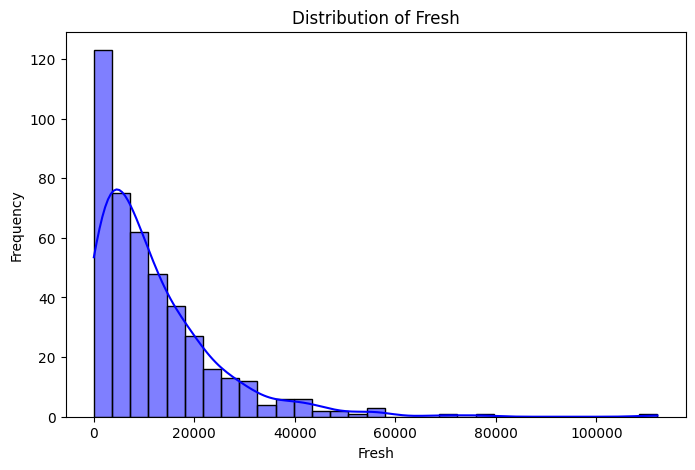

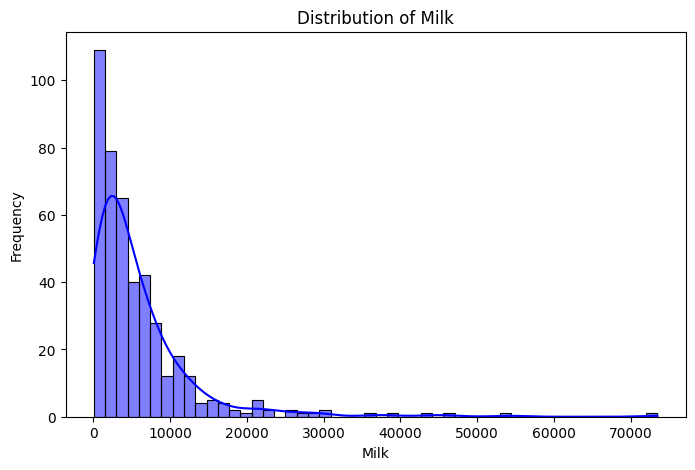

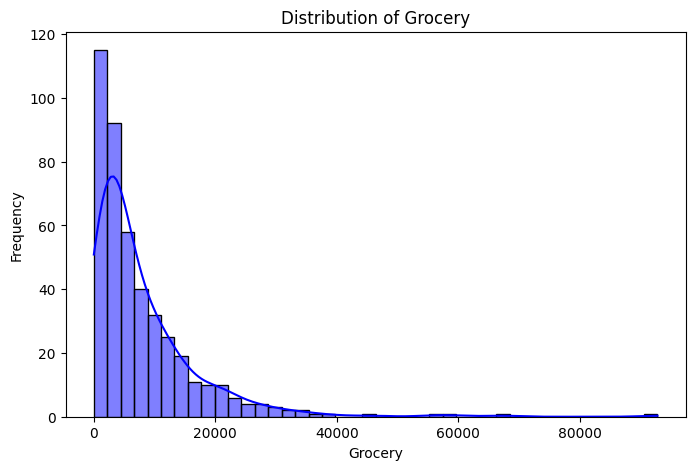

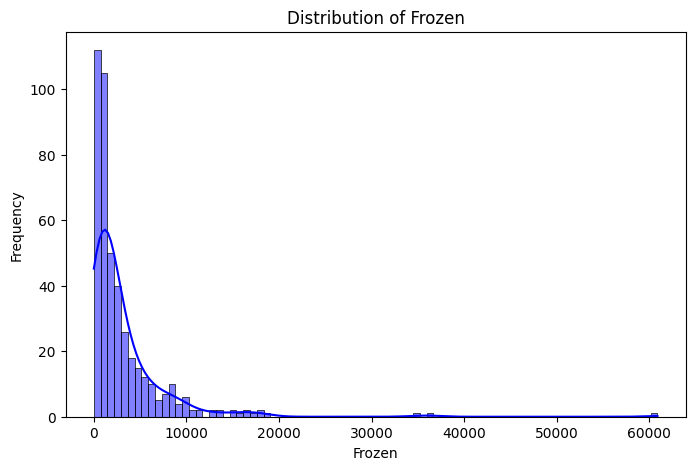

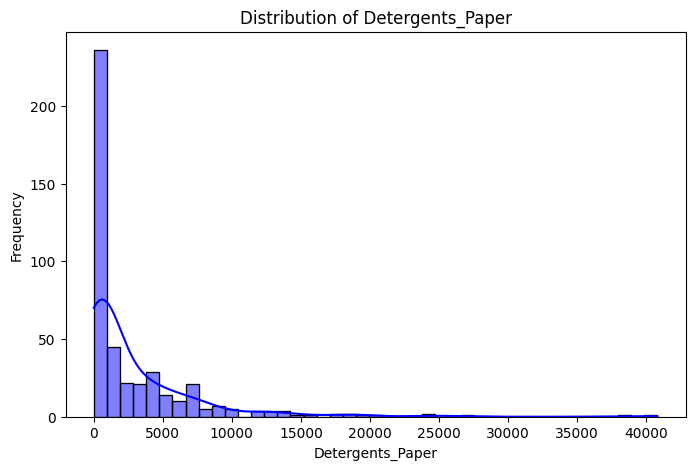

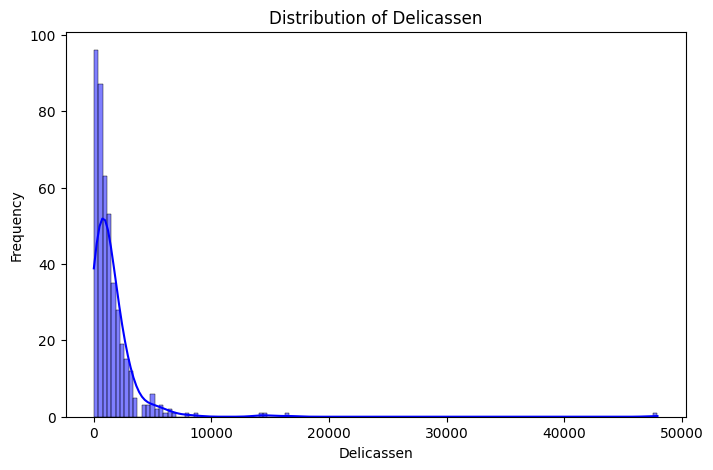

In [96]:
#Visulaizations
#Histogram to verify for skewness, potential outliers and distribution on numerical variables
for col in wholesale_data.loc[:, 'Fresh':'Delicassen']:
    plt.figure(figsize=(8, 5))
    sns.histplot(wholesale_data[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

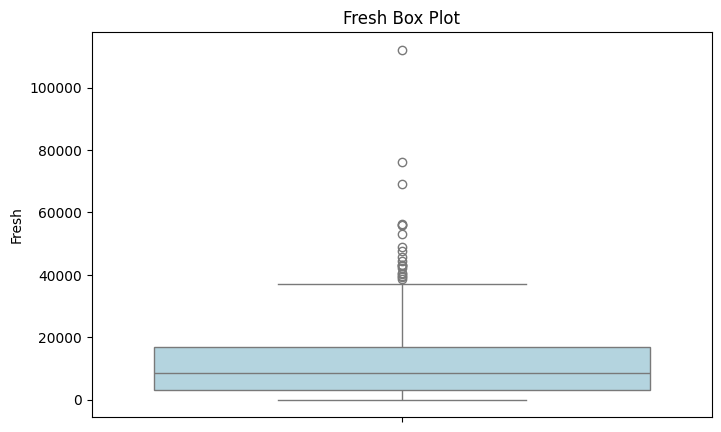

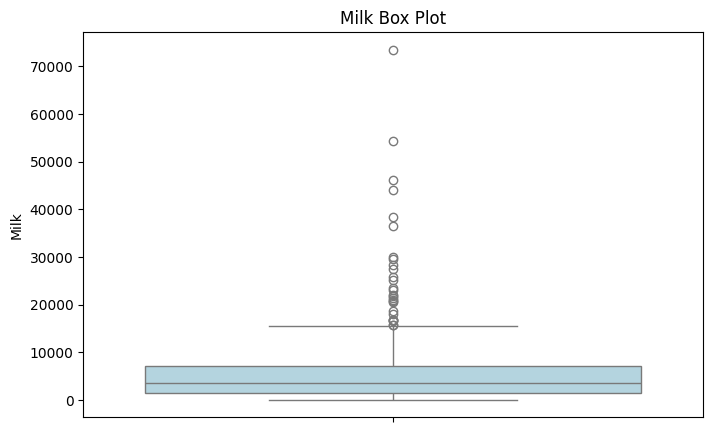

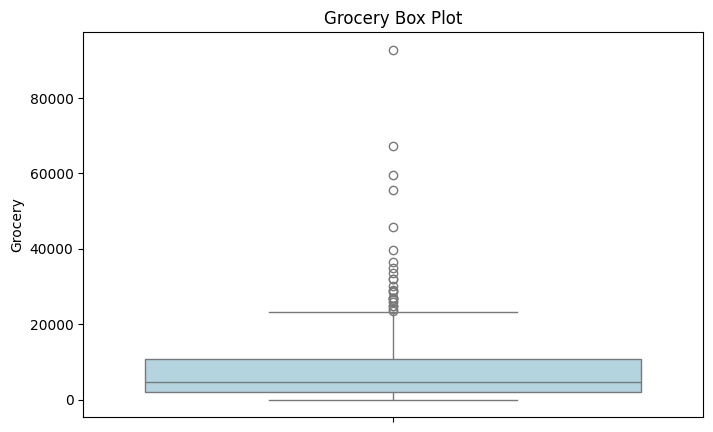

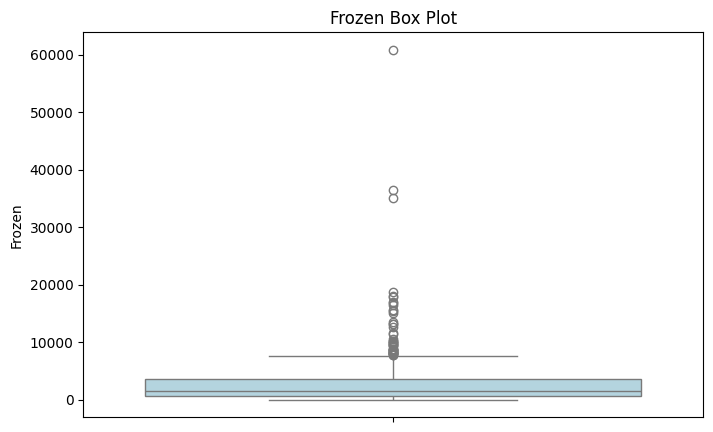

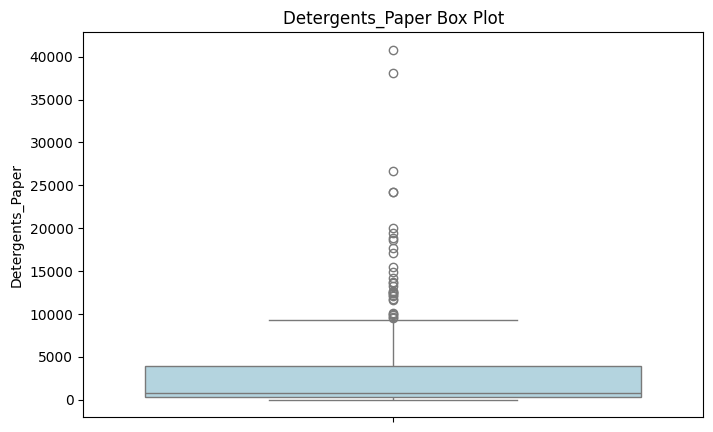

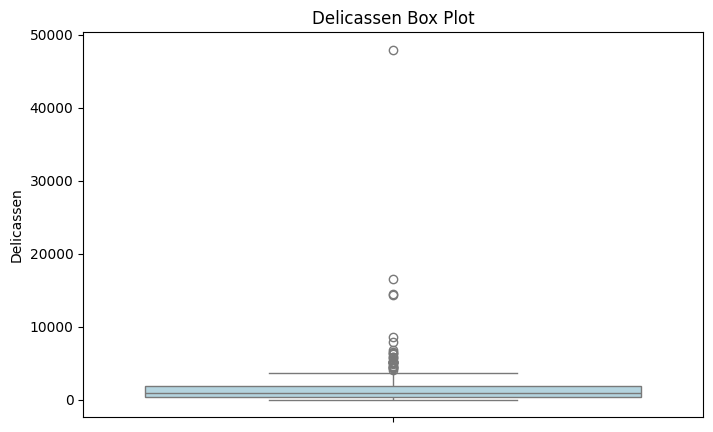

In [98]:
#Box plots for identifying outliers and comparing distributions across the numerical variables
for col in wholesale_data.loc[:, 'Fresh':'Delicassen']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=wholesale_data[col], color='lightblue')
    plt.title(f"{col} Box Plot")
    plt.ylabel(col)
    plt.show()

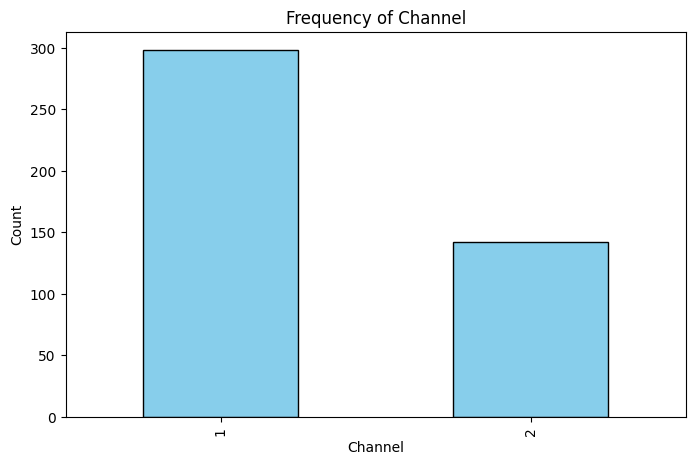

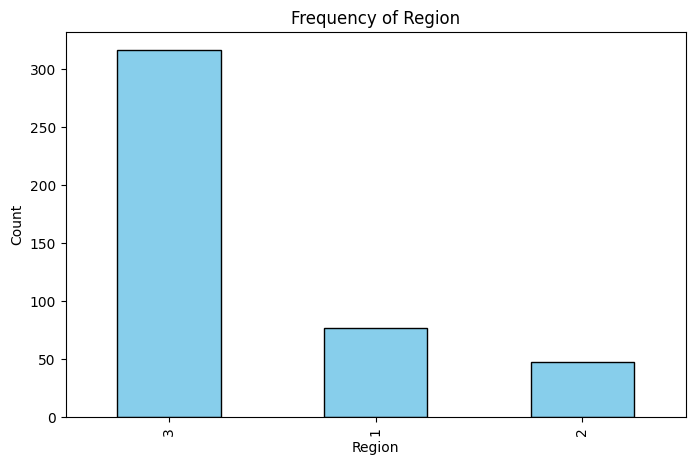

In [100]:
#Bar grapphs for categorical variables
for col in wholesale_data.loc[:, 'Channel':'Region']:
    frequency = wholesale_data[col].value_counts()

    plt.figure(figsize=(8, 5))
    frequency.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

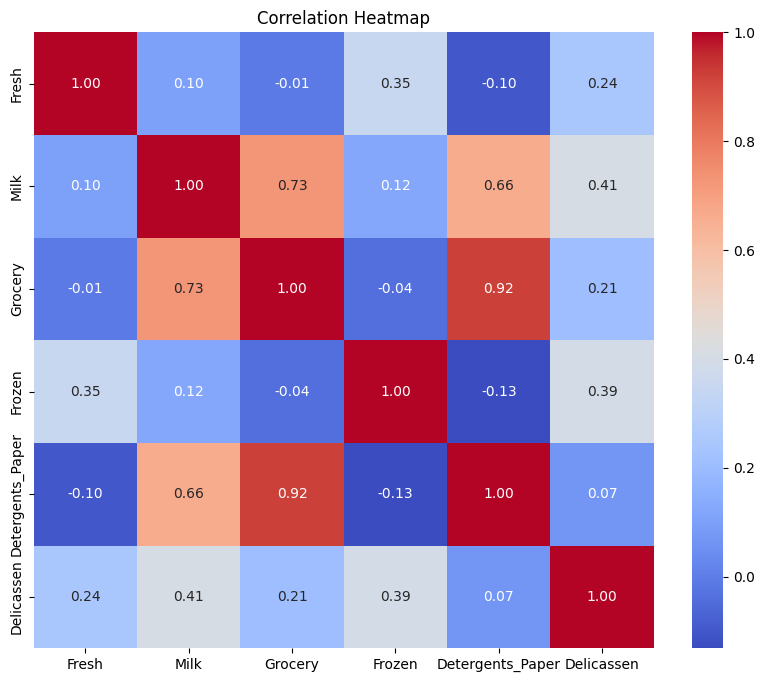

In [94]:
#Check Correlation between features
correlation_matrix = wholesale_data.loc[:, 'Fresh':'Delicassen'].corr()

#Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Correlations
1. Milk and grocery have a strong positive correlation at a 0.73, suggesting that as milk sales increase, grocery sales also tend to increase
2. Milk and Detergents_Paper have a good positive correlation at a 0.66, also suggesting that as milk sales increase, detergent and paper sales tend to increase
3. Grocery and Detergents_Paper have a very strong positive correlation at a 0.92, highly suggests that as grocery sales increase, detergent and paper sales tend to increase aswell

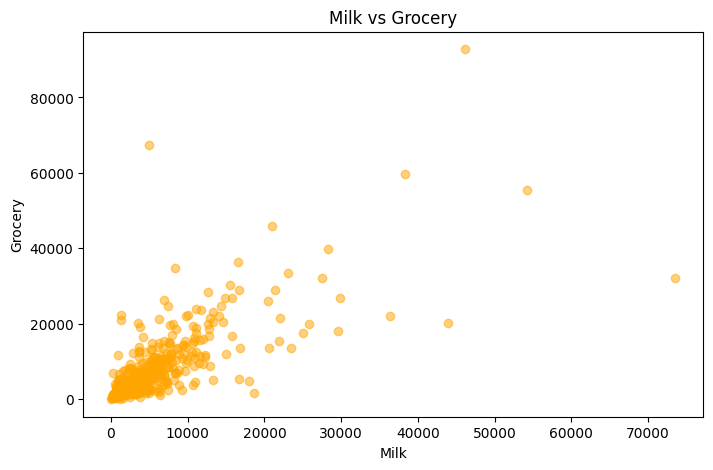

In [125]:
#Scatter plot: Milk and grocery
plt.figure(figsize=(8, 5))
plt.scatter(wholesale_data['Milk'], wholesale_data['Grocery'], color='orange', alpha=0.5)
plt.xlabel("Milk")
plt.ylabel("Grocery")
plt.title("Milk vs Grocery")
plt.show()

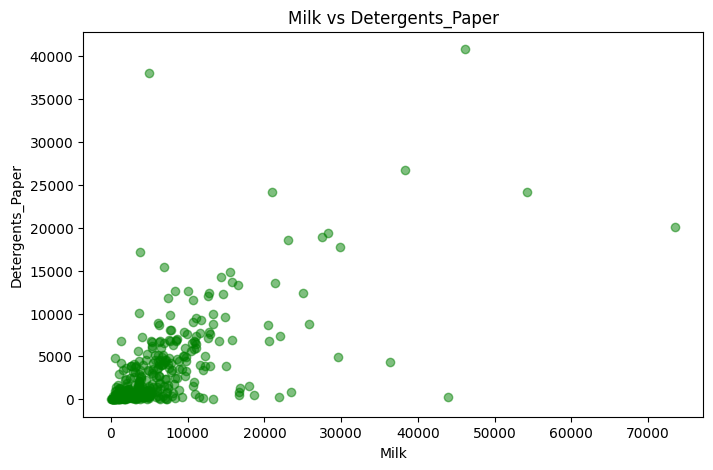

In [121]:
#Scatter plot: Milk and Detergents_Paper
plt.figure(figsize=(8, 5))
plt.scatter(wholesale_data['Milk'], wholesale_data['Detergents_Paper'], color='green', alpha=0.5)
plt.title("Milk vs Detergents_Paper")
plt.xlabel("Milk")
plt.ylabel("Detergents_Paper")
plt.show()

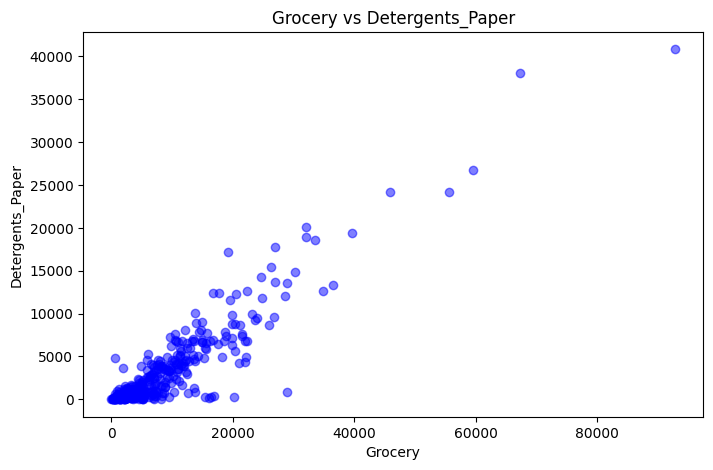

In [123]:
#Scatter plot: Grocery and Detergents_Paper
plt.figure(figsize=(8, 5))
plt.scatter(wholesale_data['Grocery'], wholesale_data['Detergents_Paper'], color='blue', alpha=0.5)
plt.title("Grocery vs Detergents_Paper")
plt.xlabel("Grocery")
plt.ylabel("Detergents_Paper")
plt.show()

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [133]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaled_wholesale_data = scaler.fit_transform(wholesale_data)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [143]:
from sklearn.cluster import KMeans

# Your code here:
kmeans = KMeans(n_clusters=3).fit(scaled_wholesale_data)

cluster_labels = kmeans.labels_

wholesale_data['labels'] = cluster_labels

C:\Users\Jarian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Looking to the elbow we can choose 2 like the correct number of clusters

In [153]:
kmeans_2 = KMeans(n_clusters=2).fit(scaled_wholesale_data)

labels = kmeans_2.predict(scaled_wholesale_data)

clusters = kmeans_2.labels_.tolist()

C:\Users\Jarian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
clean_customers['Label'] = clusters

Count the values in `labels`.

In [151]:
# Your code here:
print(wholesale_data['labels'].value_counts())

labels
0    297
2    130
1     13
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [157]:
from sklearn.cluster import DBSCAN 

# Your code here
dbscan = DBSCAN(eps=0.5).fit(scaled_wholesale_data)

dbscan_cluster_labels = dbscan.labels_

wholesale_data['labels_DBSCAN'] = dbscan_cluster_labels

Count the values in `labels_DBSCAN`.

In [160]:
# Your code here
wholesale_data['labels_DBSCAN'].value_counts()

labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [194]:
def plot(x,y,hue,title):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title(title)
    return plt.show();

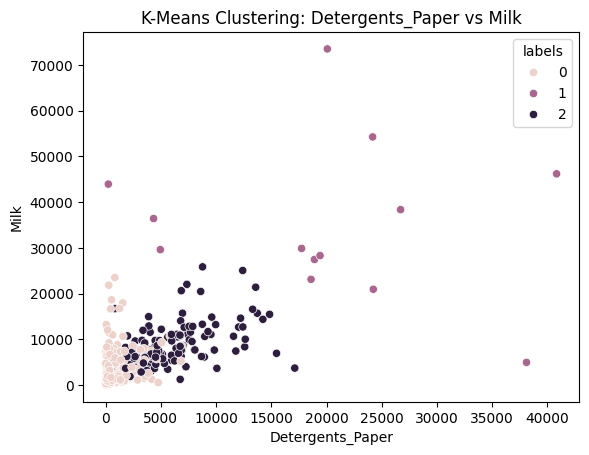

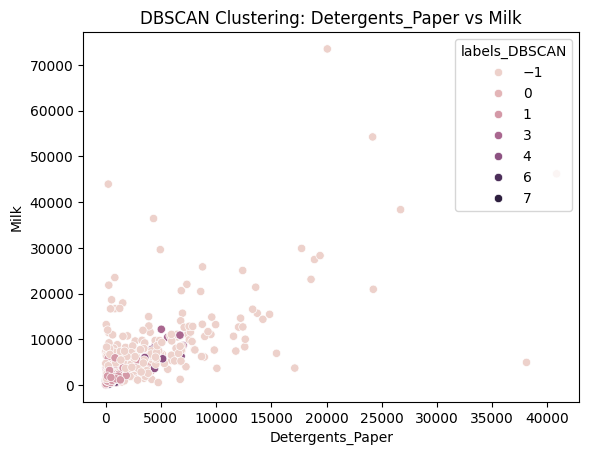

In [196]:
# Your code here:
plot(wholesale_data['Detergents_Paper'], wholesale_data['Milk'], hue=wholesale_data['labels'], title='K-Means Clustering: Detergents_Paper vs Milk')
plot(wholesale_data['Detergents_Paper'], wholesale_data['Milk'], hue=wholesale_data['labels_DBSCAN'], title='DBSCAN Clustering: Detergents_Paper vs Milk')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

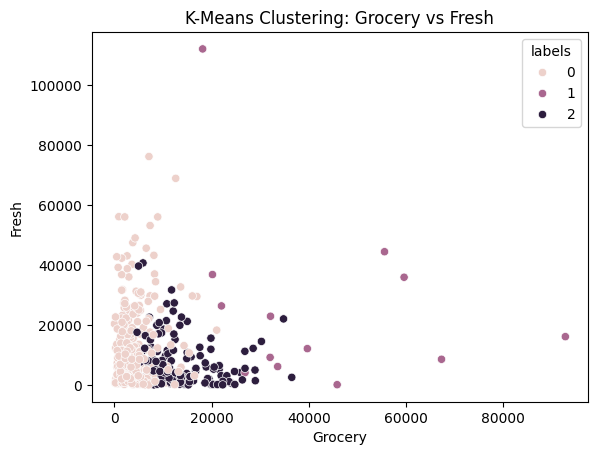

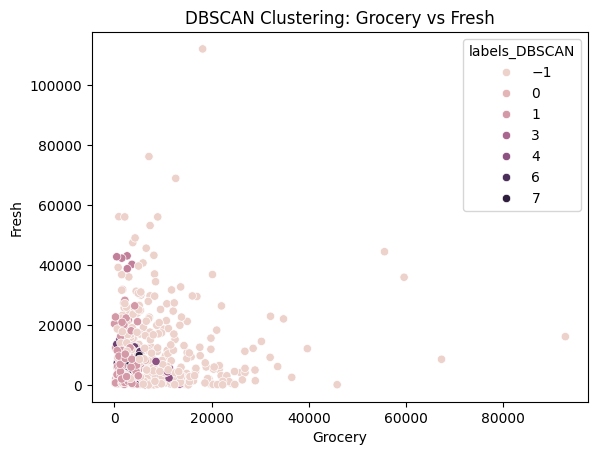

In [198]:
# Your code here:
plot(wholesale_data['Grocery'], wholesale_data['Fresh'], hue=wholesale_data['labels'], title='K-Means Clustering: Grocery vs Fresh')
plot(wholesale_data['Grocery'], wholesale_data['Fresh'], hue=wholesale_data['labels_DBSCAN'], title='DBSCAN Clustering: Grocery vs Fresh')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

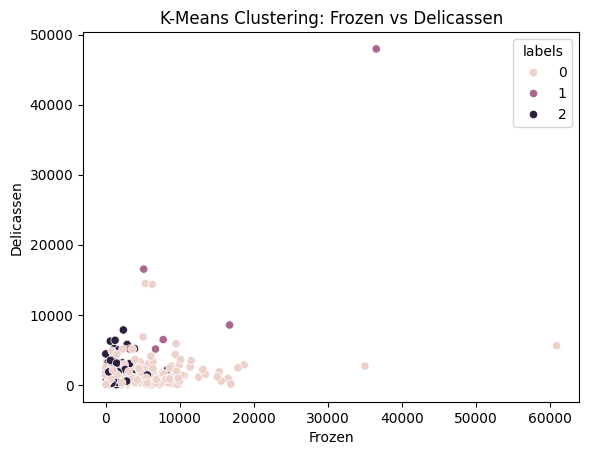

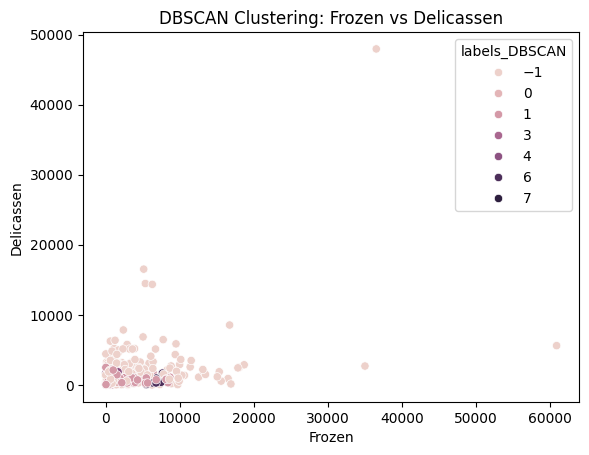

In [200]:
# Your code here:
plot(wholesale_data['Frozen'], wholesale_data['Delicassen'], hue=wholesale_data['labels'], title='K-Means Clustering: Frozen vs Delicassen')
plot(wholesale_data['Frozen'], wholesale_data['Delicassen'], hue=wholesale_data['labels_DBSCAN'], title='DBSCAN Clustering: Frozen vs Delicassen')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [208]:
# Your code here:
kmeans_grouped = wholesale_data.groupby('labels').mean()

dbscan_grouped = wholesale_data.groupby('labels_DBSCAN').mean()

print(f"Means grouped by K-Means labels: {kmeans_grouped}\n")

print(f"Means grouped by DBSCAN labels: {dbscan_grouped}")

Means grouped by K-Means labels:          Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.003367  2.505051  13075.898990   3218.737374   3855.696970   
1       1.846154  2.615385  25770.769231  35160.384615  41977.384615   
2       2.000000  2.623077   8165.915385   8748.515385  13905.492308   

             Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
labels                                                             
0       3620.400673        776.875421  1242.249158       0.646465  
1       6844.538462      19867.384615  7880.307692      -1.000000  
2       1441.630769       5991.146154  1535.007692      -0.538462  

Means grouped by DBSCAN labels:                 Channel   Region         Fresh          Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.490196  2.45098  13729.564706   8359.886275  11484.364706   

Which algorithm appears to perform better?

**Your observations here**

- Upon my observations, I think the algorithm that performed the best was the K-Means algorithm for this dataset. This is because K-Means generated well-separated clusters with clear distinctions between groups, particularly between high-value customers (Cluster 1) and moderate-value ones (Cluster 0). The model works well when the data is relatively homogeneous, and clear, predefined clusters are expected. On the other hand, DBSCAN's ability to identify noise points (label -1) is useful but results in less well-defined clusters, with some data points falling outside of meaningful groupings. While DBSCAN provides more flexibility and identifies outliers, the clusters it forms are more dispersed and less intuitive than those produced by K-Means. Therefore, for this dataset, K-Means offers clearer and more interpretable clustering, making it the preferred choice.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 